In [12]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import wandb
from utils.config import load_toml
ratio  = [0.25,0.5,1,2]
basic_cartpole_score = [291.312,316.264,428.796,396.948]
true_reanalyze = [1.5,2.5,3.5,4.5]
fast_reanalyze = [188.94,304.408,406.528,455.816]

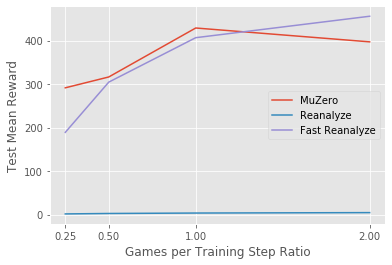

In [20]:
with plt.style.context("ggplot"):
    plt.plot(ratio, basic_cartpole_score, label = "MuZero")
    plt.plot(ratio, true_reanalyze, label = "Reanalyze")
    plt.plot(ratio, fast_reanalyze, label = "Fast Reanalyze")
    plt.xlabel('Games per Training Step Ratio')
    plt.ylabel('Test Mean Reward')
    plt.xticks( ratio)
    plt.legend()
    pathlib.Path("./images").mkdir(exist_ok=True)
    plt.savefig("./images/score_ratio.png")
    plt.show("Score ")

In [10]:
api = wandb.Api()
evaluation_config_path = "./configs/config.toml"
config = load_toml(evaluation_config_path)
basic_cartpole_ids = ["1f0quoey","1e6j8u4o","153qjoct","18lvaszi","35nozmvj"]
true_reanalyze_ids = ["3cplek04","3ih50gi5","weviku4e","k6xd6war","2oqi8o9f"]
fast_reanalyze_ids = ["11rppoi5","34zu5vue","1eouuvl1","accx95qv","1f5g1b4f"]
basic_cartpole_training_time = [api.run(path=f"{config.wandb.entity}/{config.wandb.project_name}/{id}").summary["_runtime"] for id in basic_cartpole_ids]
true_reanalyze_training_time = [api.run(path=f"{config.wandb.entity}/{config.wandb.project_name}/{id}").summary["_runtime"] for id in true_reanalyze_ids]
fast_reanalyze_training_time = [api.run(path=f"{config.wandb.entity}/{config.wandb.project_name}/{id}").summary["_runtime"] for id in fast_reanalyze_ids]
average_time = {
    "basic_cartpole_score": np.mean(basic_cartpole_training_time) /60,
    "true_reanalyze":np.mean(true_reanalyze_training_time)/60,
    "fast_reanalyze":np.mean(fast_reanalyze_training_time)/60
}
print(average_time)

{'basic_cartpole_score': 11.75375507513682, 'true_reanalyze': 97.9153746318817, 'fast_reanalyze': 15.616902729670207}
